In [1]:
import numpy as np
import pandas as pd

In [2]:
dataf = pd.read_csv('/mnt/d/pvsc/data.sci/superds/future500.csv')

In [3]:
dataf.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,1,Over-Hex,Software,2006.0,25.0,TN,Franklin,"$9,684,527","1,130,700 Dollars",8553827.0,19%
1,2,Unimattax,IT Services,2009.0,36.0,PA,Newtown Square,"$14,016,543","804,035 Dollars",13212508.0,20%
2,3,Greenfax,Retail,2012.0,NaN,SC,Greenville,"$9,746,272","1,044,375 Dollars",8701897.0,16%
3,4,Blacklane,IT Services,2011.0,66.0,CA,Orange,"$15,359,369","4,631,808 Dollars",10727561.0,19%
4,5,Yearflex,Software,2013.0,45.0,WI,Madison,"$8,567,910","4,374,841 Dollars",4193069.0,19%


<AxesSubplot:>

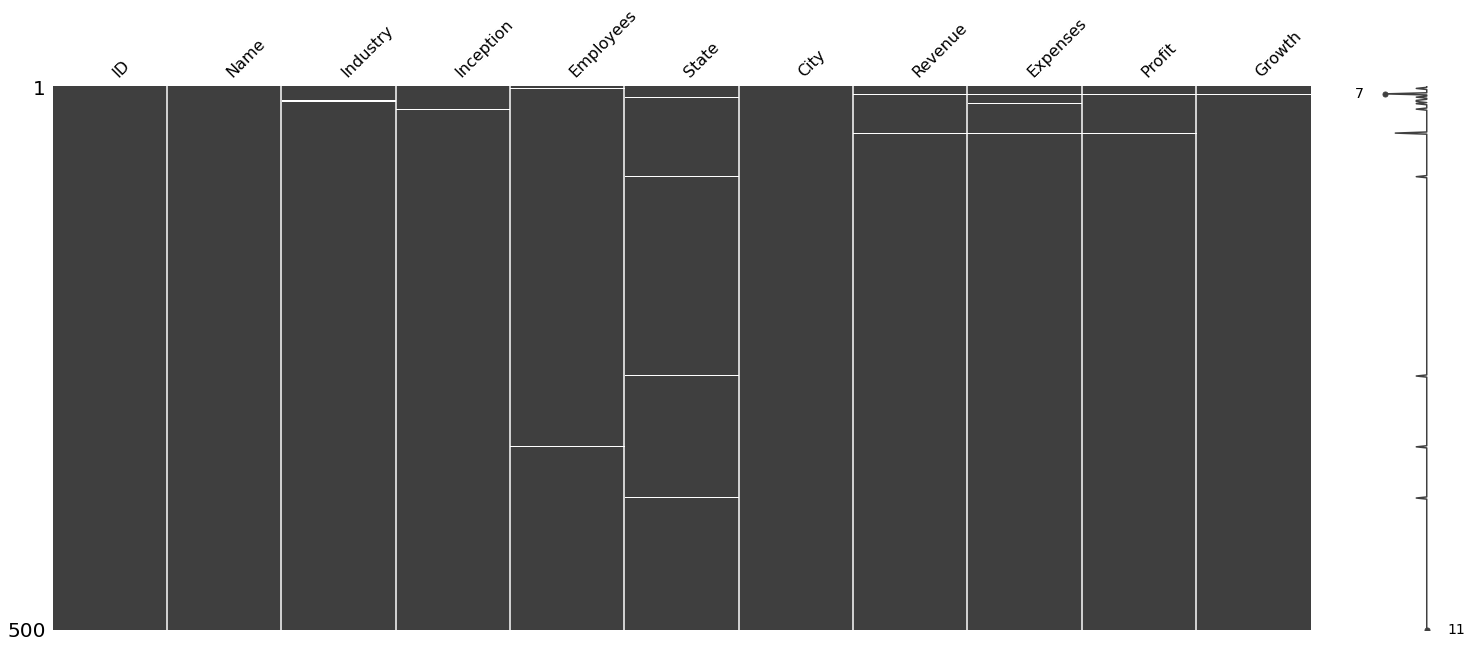

In [4]:
import missingno as ms
ms.matrix(dataf)

In [5]:
#feature engineering
dataf['Expenses']=pd.to_numeric(dataf['Expenses'].str.replace('[^0-9]',''))

<ipython-input-5-2db4a2b02bf2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataf['Expenses']=pd.to_numeric(dataf['Expenses'].str.replace('[^0-9]',''))


In [6]:
dataf['Revenue'] = pd.to_numeric(dataf['Revenue'].str.replace('[^0-9]',''))
dataf['Growth'] = pd.to_numeric(dataf['Growth'].str.replace('[^0-9]',''))
dataf.head()

<ipython-input-6-c0c8f888f196>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataf['Revenue'] = pd.to_numeric(dataf['Revenue'].str.replace('[^0-9]',''))
<ipython-input-6-c0c8f888f196>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataf['Growth'] = pd.to_numeric(dataf['Growth'].str.replace('[^0-9]',''))


,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,1,Over-Hex,Software,2006.0,25.0,TN,Franklin,9684527.0,1130700.0,8553827.0,19.0
1,2,Unimattax,IT Services,2009.0,36.0,PA,Newtown Square,14016543.0,804035.0,13212508.0,20.0
2,3,Greenfax,Retail,2012.0,NaN,SC,Greenville,9746272.0,1044375.0,8701897.0,16.0
3,4,Blacklane,IT Services,2011.0,66.0,CA,Orange,15359369.0,4631808.0,10727561.0,19.0
4,5,Yearflex,Software,2013.0,45.0,WI,Madison,8567910.0,4374841.0,4193069.0,19.0


In [7]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         500 non-null    int64  
 1   Name       500 non-null    object 
 2   Industry   498 non-null    object 
 3   Inception  499 non-null    float64
 4   Employees  498 non-null    float64
 5   State      496 non-null    object 
 6   City       500 non-null    object 
 7   Revenue    498 non-null    float64
 8   Expenses   497 non-null    float64
 9   Profit     498 non-null    float64
 10  Growth     499 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 43.1+ KB


In [8]:
dataf[dataf.isna().any(axis=1)]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
2,3,Greenfax,Retail,2012.0,NaN,SC,Greenville,9746272.0,1044375.0,8701897.0,16.0
7,8,Rednimdox,Construction,2013.0,73.0,NY,Woodside,NaN,NaN,NaN,NaN
10,11,Canecorporation,Health,2012.0,6.0,NaN,New York,10597009.0,7591189.0,3005820.0,7.0
13,14,Techline,NaN,2006.0,65.0,CA,San Ramon,13898119.0,5470303.0,8427816.0,23.0
14,15,Cityace,NaN,2010.0,25.0,CO,Louisville,9254614.0,6249498.0,3005116.0,6.0
16,17,Ganzlax,IT Services,2011.0,75.0,NJ,Iselin,14001180.0,NaN,11901180.0,18.0
21,22,Lathotline,Health,NaN,103.0,VA,McLean,9418303.0,7567233.0,1851070.0,2.0
43,44,Ganzgreen,Construction,2010.0,224.0,TN,Franklin,NaN,NaN,NaN,9.0
83,84,Drilldrill,Software,2010.0,30.0,NaN,San Francisco,7800620.0,2785799.0,5014821.0,17.0
266,267,Circlechop,Software,2010.0,14.0,NaN,San Francisco,9067070.0,5929828.0,3137242.0,20.0


In [9]:
dataf[dataf['Expenses'].isna()]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
7,8,Rednimdox,Construction,2013.0,73.0,NY,Woodside,NaN,NaN,NaN,NaN
16,17,Ganzlax,IT Services,2011.0,75.0,NJ,Iselin,14001180.0,NaN,11901180.0,18.0
43,44,Ganzgreen,Construction,2010.0,224.0,TN,Franklin,NaN,NaN,NaN,9.0


In [10]:
dataf[(dataf['Expenses'].isna()) & (dataf['Industry']=='Construction')]['Expenses'] = dataf[dataf['Industry']=='Construction']['Expenses'].median()

<ipython-input-10-42749a4e0a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['Expenses'].isna()) & (dataf['Industry']=='Construction')]['Expenses'] = dataf[dataf['Industry']=='Construction']['Expenses'].median()


In [11]:
dataf[(dataf['Expenses'].isna()) & (dataf['Industry']=='IT Services')]['Expenses'] = dataf[dataf['Industry']=='IT Services']['Expenses'].median()

<ipython-input-11-80836636fa94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['Expenses'].isna()) & (dataf['Industry']=='IT Services')]['Expenses'] = dataf[dataf['Industry']=='IT Services']['Expenses'].median()


In [12]:
dataf[(dataf['State'].isna()) & (dataf['City']=='San Francisco')]['State'] = 'CA'

<ipython-input-12-647fae79e250>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['State'].isna()) & (dataf['City']=='San Francisco')]['State'] = 'CA'


In [13]:
dataf[(dataf['State'].isna()) & (dataf['City']=='New York')]['State'] = 'NY'

<ipython-input-13-a2f01af5a300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['State'].isna()) & (dataf['City']=='New York')]['State'] = 'NY'


In [14]:
dataf[(dataf['Employees'].isna()) & (dataf['Industry']=='Retail')]['Employee'] = dataf[dataf['Industry']=='Retail']['Employees'].median()

<ipython-input-14-89553501e53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['Employees'].isna()) & (dataf['Industry']=='Retail')]['Employee'] = dataf[dataf['Industry']=='Retail']['Employees'].median()


In [15]:
dataf[(dataf['Employees'].isna()) & (dataf['Industry']=='Financial Services')]['Employee'] = dataf[dataf['Industry']=='Financial Services']['Employees'].median()

<ipython-input-15-3202c8d19b88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf[(dataf['Employees'].isna()) & (dataf['Industry']=='Financial Services')]['Employee'] = dataf[dataf['Industry']=='Financial Services']['Employees'].median()


In [16]:
dataf[dataf.isna().any(axis=1)]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
2,3,Greenfax,Retail,2012.0,NaN,SC,Greenville,9746272.0,1044375.0,8701897.0,16.0
7,8,Rednimdox,Construction,2013.0,73.0,NY,Woodside,NaN,NaN,NaN,NaN
10,11,Canecorporation,Health,2012.0,6.0,NaN,New York,10597009.0,7591189.0,3005820.0,7.0
13,14,Techline,NaN,2006.0,65.0,CA,San Ramon,13898119.0,5470303.0,8427816.0,23.0
14,15,Cityace,NaN,2010.0,25.0,CO,Louisville,9254614.0,6249498.0,3005116.0,6.0
16,17,Ganzlax,IT Services,2011.0,75.0,NJ,Iselin,14001180.0,NaN,11901180.0,18.0
21,22,Lathotline,Health,NaN,103.0,VA,McLean,9418303.0,7567233.0,1851070.0,2.0
43,44,Ganzgreen,Construction,2010.0,224.0,TN,Franklin,NaN,NaN,NaN,9.0
83,84,Drilldrill,Software,2010.0,30.0,NaN,San Francisco,7800620.0,2785799.0,5014821.0,17.0
266,267,Circlechop,Software,2010.0,14.0,NaN,San Francisco,9067070.0,5929828.0,3137242.0,20.0


In [17]:
dataf.dropna(inplace= True)

In [18]:
import seaborn as sns
sns.set_style('darkgrid')

In [19]:
dataf.head()

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
0,1,Over-Hex,Software,2006.0,25.0,TN,Franklin,9684527.0,1130700.0,8553827.0,19.0
1,2,Unimattax,IT Services,2009.0,36.0,PA,Newtown Square,14016543.0,804035.0,13212508.0,20.0
3,4,Blacklane,IT Services,2011.0,66.0,CA,Orange,15359369.0,4631808.0,10727561.0,19.0
4,5,Yearflex,Software,2013.0,45.0,WI,Madison,8567910.0,4374841.0,4193069.0,19.0
5,6,Indigoplanet,IT Services,2013.0,60.0,NJ,Manalapan,12805452.0,4626275.0,8179177.0,22.0


/home/shaury/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


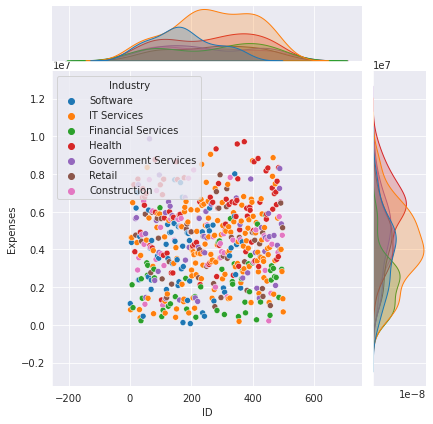

In [20]:
sns.jointplot(dataf['ID'],dataf['Expenses'],data=dataf,hue=dataf['Industry'])

/home/shaury/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


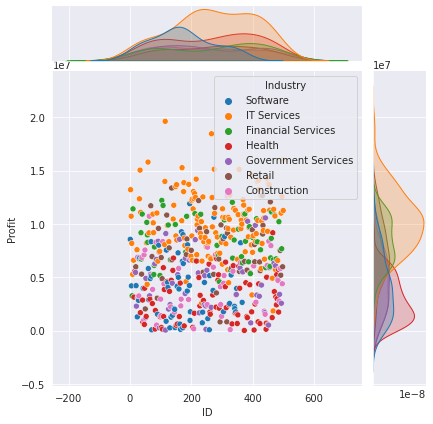

In [21]:
sns.jointplot(dataf['ID'],dataf['Profit'],data=dataf,hue=dataf['Industry'])

/home/shaury/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


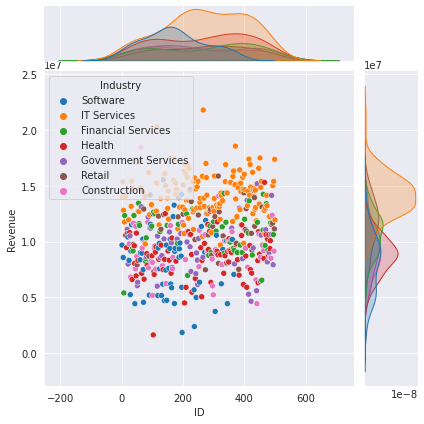

In [22]:
sns.jointplot(dataf['ID'],dataf['Revenue'],data=dataf,hue=dataf['Industry'])

/home/shaury/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


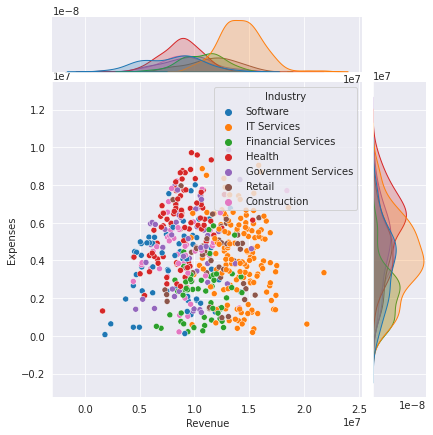

In [23]:
sns.jointplot(dataf['Revenue'],dataf['Expenses'],data=dataf,hue=dataf['Industry'])

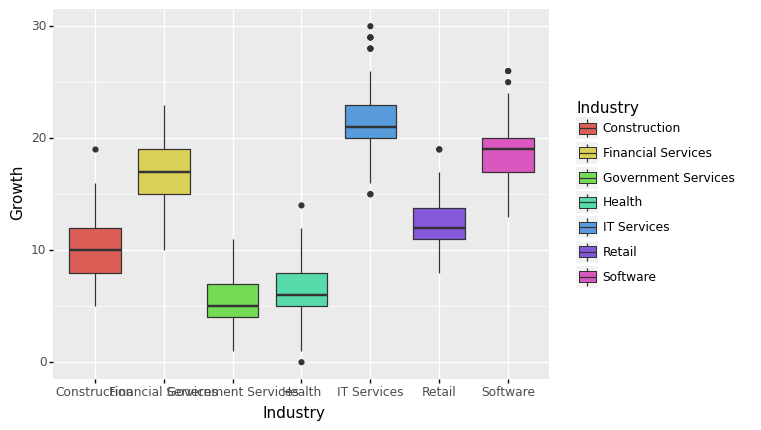

<ggplot: (8783481800939)>

In [31]:
from plotnine import ggplot,aes,geom_boxplot
ggplot(dataf)+geom_boxplot(aes(y=dataf['Growth'],x=dataf['Industry'],fill=dataf['Industry']))